## Understanding Periodic Matter Driven Neutrino Oscillations

blablablabla

I have an analytical expression using two folds of approximations.

To check out how good the expression is doing, I need to verify at three levels.

1. Compare the solution to the equation I have after the first RWA approximation and the final result;
2. Compare the solution to the equation I have after the first RWA approximation and the solution to the original equation;
3. IF the solution works well in the previous two comparisons, compare the solution to the original equation and the final analytical expression.

**Before doing anything, check if it is possible to find an analytical solution to the RWA approximated equation!**

## Prep

In [2]:
%matplotlib inline
%load_ext snakeviz

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pylab as plt

### Analytical Expressioin

The final approximated result is

In [4]:
beta = 0.1 # beta = \omega_\lambda/\omega
alpha = 0.1 # alpha = lambda_0 /\omega
sin2thetav = 0.917
cos2thetav = 0.4

In [5]:
sin2thetav**2+cos2thetav**2

1.0008890000000001

In [10]:
def prob3(alp,bet,x):
    
    # alp = alpha, bet = beta
    
    aOverOmega = (alp * sin2thetav / 2 )
    deltaOverOmega = 1.0 - bet - 0.5*alp*cos2thetav*np.cos(bet*x)
    
    omegaRHat = np.sqrt(deltaOverOmega**2 + aOverOmega**2 )
    omegaRHatsquare = deltaOverOmega**2 + aOverOmega**2 
    
    return (alp*sin2thetav)**2*(np.sin(omegaRHat*x/2))**2/(4*(omegaRHatsquare**2))
    

In [11]:
prob3(alpha,beta,0.5)

0.00016647688943883517

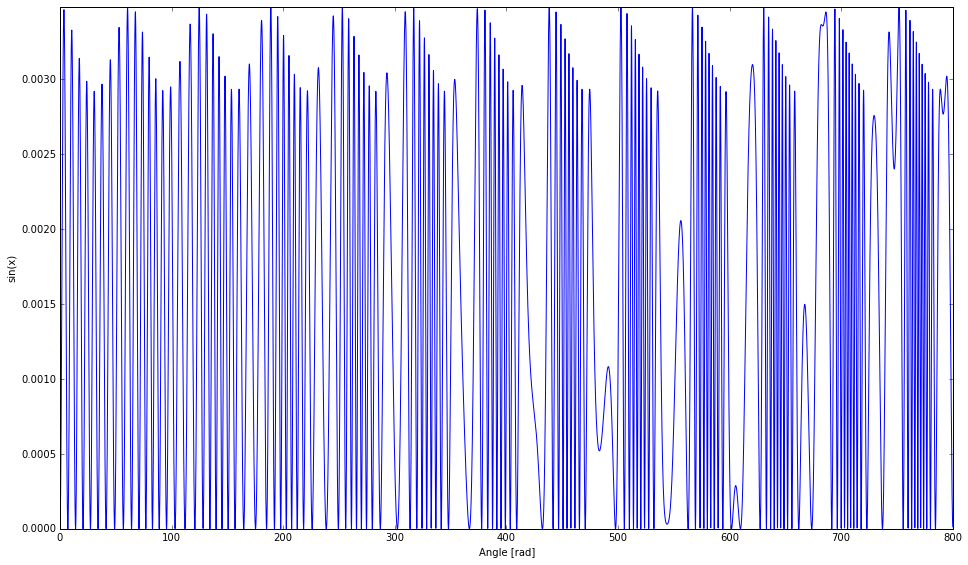

In [13]:
pltend = 800
pltlinsize = pltend*10 + 1
x = np.linspace(0, pltend, pltlinsize)
plt.figure(figsize = (16,9.36))
plt.plot(x, prob3(alpha,beta,x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

## Solving Completely

Define the coefficient matrix K for the equations to be solved, which comes in to the equation as $\frac{dC}{dt} = K C$, where C is the vector of unknown, $C = \begin{pmatrix} C_{1,R} & C_{1,I} & C_{2,R} & C_{2,I} \end{pmatrix}$

In [14]:
def kMatrix(x):
    k0 = alpha*cos2thetav*np.cos(beta*x)/2
    k11, k22, k33, k44 = 0,0,0,0
    k12, k21, k34, k43 = 1.0, -1.0, 1.0, -1.0
    k13, k31, k14, k41 = - sin2thetav*np.sin(beta*x),  sin2thetav*np.sin(beta*x),  sin2thetav*np.cos(beta*x), -sin2thetav*np.cos(beta*x)
    k23, k32, k24, k42 =  - sin2thetav*np.cos(beta*x), sin2thetav*np.cos(beta*x), -sin2thetav*np.sin(beta*x),sin2thetav*np.sin(beta*x)
    
    return k0*np.array([[k11,k12,k13,k14],[k21,k22,k23,k24],[k31,k32,k33,k34],[k41,k42,k43,k44]])

In [15]:
def derivlist(c,x):
    return np.dot(kMatrix(x),np.array([c[0],c[1],c[2],c[3]]))

In [16]:
xlist = np.linspace(0,800,10000)
cinit = np.array([1.0,0.0,0.0,0.0])
c = odeint(derivlist,cinit,xlist)

Probability is $\lvert C_2 \rvert^2$

In [17]:
def probOriginal(x):
    return c[:,2]**2+c[:,3]**2

def normOriginal(x):
    return  c[:,0]**2+c[:,1]**2 + c[:,2]**2+c[:,3]**2

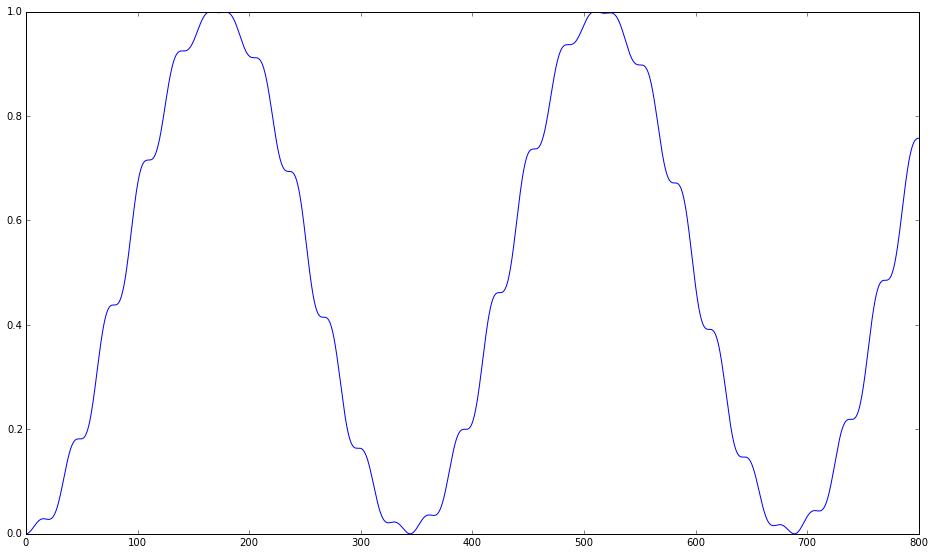

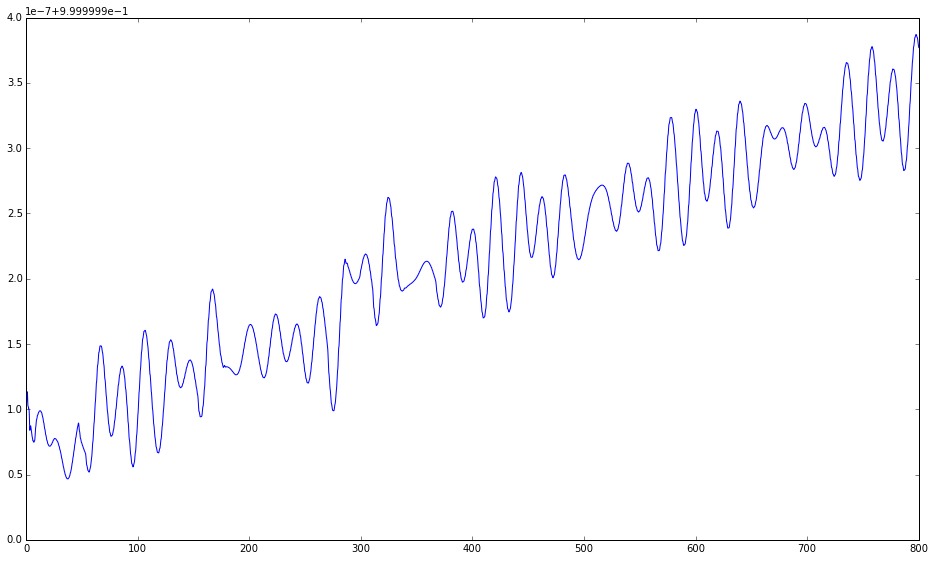

In [18]:
plt.figure(figsize = (16,9.36))
plt.plot(xlist,probOriginal(xlist)/normOriginal(xlist))
plt.show()

plt.figure(figsize = (16,9.36))
plt.plot(xlist,normOriginal(xlist))
plt.show()

## Solving RWA Equations Numerically

The first order derivatives of $RWAC_2 = (C_{2,R},C_{2,I}, C_{2p,R},C_{2p,I})$ where $C_{2,p}=\frac{d C_2}{d\bar x}$, is given by this list.

In [19]:
a = alpha*cos2thetav/2
b = alpha*sin2thetav/2
    
def rwac2derivlist(rwac2,x):
    
    dc2R = rwac2[2]
    dc2I = rwac2[3]
    
    dc2pR = (-a + (a**2 - b**2)*np.cos(beta*x) )*np.cos(beta*x)*rwac2[0] + a*beta*np.sin(beta*x)*rwac2[1]+ beta*np.tan(beta*x)*rwac2[2] + ( 1 - 2*a*np.cos(beta*x) )*rwac2[3]      
    dc2pI = (- a * beta*np.sin(beta*x)  )*rwac2[0] + ( -a + (a**2 - b**2)*np.cos(beta*x))*np.cos(beta*x)*rwac2[1] - (1 - 2*a*np.cos(beta*x))*rwac2[2] + beta*np.tan(beta*x)*rwac2[3]
    
    return np.array([dc2R,dc2I,dc2pR,dc2pI])

In [20]:
rwaxlist = np.linspace(0,800,10000)
rwac2init = np.array([0.0,0.0,0.0,-a])
rwac2 = odeint(rwac2derivlist,rwac2init,rwaxlist)

Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.


In [21]:
def probRWA(x):
    return rwac2[:,0]**2 + rwac2[:,1]**2

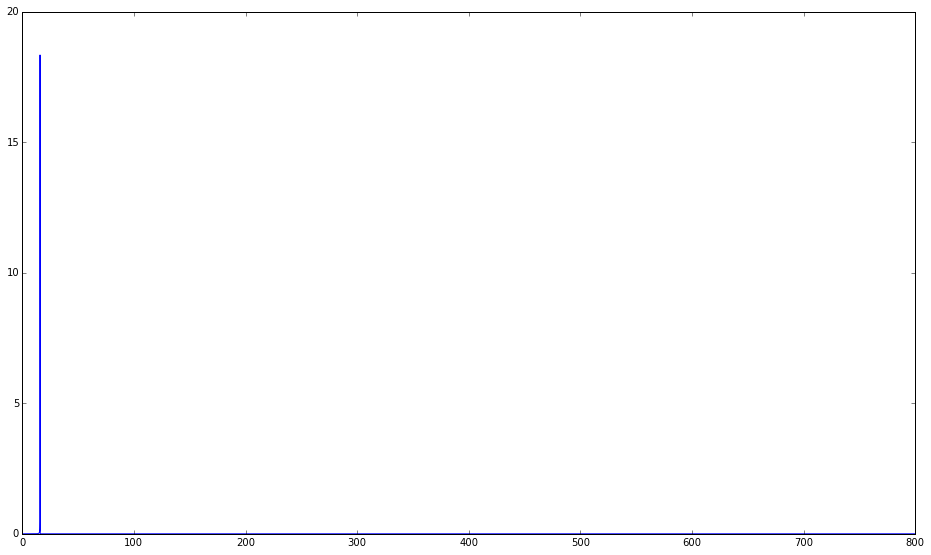

In [22]:
plt.figure(figsize = (16,9.36))
plt.plot(rwaxlist,probRWA(xlist))
plt.show()

Using ode

In [23]:
from scipy.integrate import ode

In [28]:
def rwac2ODEFunc(x,rwac2):
    
    dc2R = rwac2[2]
    dc2I = rwac2[3]
    
    dc2pR = (-a + (a**2 - b**2)*np.cos(beta*x) )*np.cos(beta*x)*rwac2[0] + a*beta*np.sin(beta*x)*rwac2[1]+ beta*np.tan(beta*x)*rwac2[2] + ( 1 - 2*a*np.cos(beta*x) )*rwac2[3]      
    dc2pI = (- a * beta*np.sin(beta*x)  )*rwac2[0] + ( -a + (a**2 - b**2)*np.cos(beta*x))*np.cos(beta*x)*rwac2[1] - (1 - 2*a*np.cos(beta*x))*rwac2[2] + beta*np.tan(beta*x)*rwac2[3]
    
    return np.array([dc2R,dc2I,dc2pR,dc2pI])

rwac2ODE = ode(rwac2ODEFunc).set_integrator('dopri5', method='bdf')
rwainitxODE = 0.0
rwac2initODE = np.array([0.0,0.0,0.0,-a])
rwac2ODE.set_initial_value(rwac2initODE, rwainitxODE)
rwaendatODE = 10
rwadxODE = 0.0001
rwacountODE = 0
rwac2Vec = np.array([np.zeros(rwaendatODE/rwadxODE),np.zeros(rwaendatODE/rwadxODE),np.zeros(rwaendatODE/rwadxODE),np.zeros(rwaendatODE/rwadxODE)])
while rwac2ODE.successful() and rwac2ODE.t < rwaendatODE:
    rwac2ODE.integrate(rwac2ODE.t+rwadxODE)
    for i in np.array([0,1,2,3]):
        rwac2Vec[i,rwacountODE] = rwac2ODE.y[i]
    rwacountODE += 1
    
rwaxlistODE = np.linspace(rwainitxODE,rwaendatODE,rwaendatODE/rwadxODE)

IndexError: index 100000 is out of bounds for axis 1 with size 100000

In [ ]:
plt.figure(figsize = (16,9.36))
plt.plot(rwaxlistODE,rwac2Vec[2])
plt.show()